# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [1]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/college_completion.csv',low_memory=False)

In [8]:
#2
# Dimensions of the dataset
print("Dimensions (rows, columns):", df.shape)

# Variables (columns)
print("Variables:", df.columns.tolist())

# Preview first few rows
print(df.head())

Dimensions (rows, columns): (3798, 63)
Variables: ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_a

In [9]:
#3
# Cross tabulation
ct = pd.crosstab(df['control'], df['level'])
print(ct)

#Public institutions dominate the 2-year level, with 926. However, there are still
# a decent amount of private 2-year institutions.
#Private not-for-profit dominate the 4-year category.

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


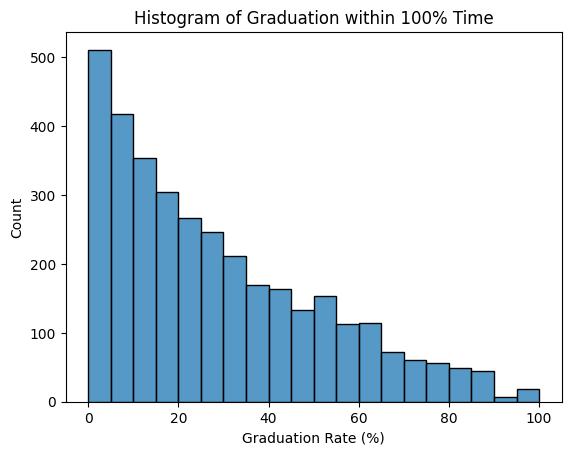

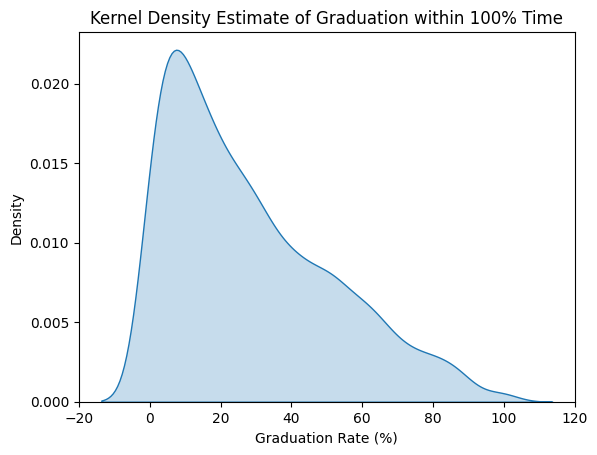

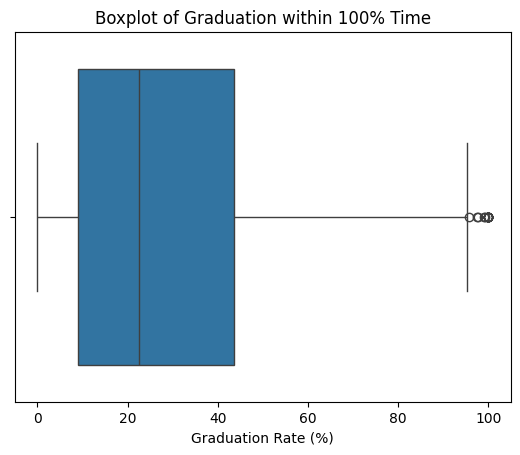

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [12]:
#4

#Drop missing values (if any) in grad_100_value
grad = df['grad_100_value'].dropna()

# Histogram
sns.histplot(grad, bins=20, kde=False)
plt.title("Histogram of Graduation within 100% Time")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Count")
plt.show()

# Kernel density plot
sns.kdeplot(grad, fill=True)
plt.title("Kernel Density Estimate of Graduation within 100% Time")
plt.xlabel("Graduation Rate (%)")
plt.show()

# Boxplot
sns.boxplot(x=grad)
plt.title("Boxplot of Graduation within 100% Time")
plt.xlabel("Graduation Rate (%)")
plt.show()

# Statistical description
print(grad.describe())

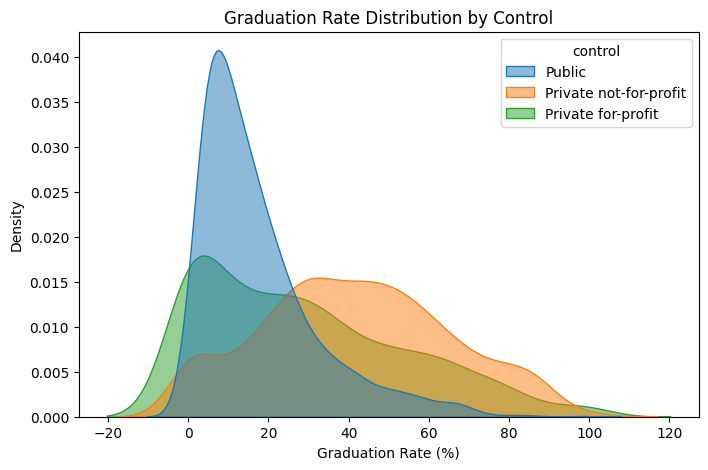

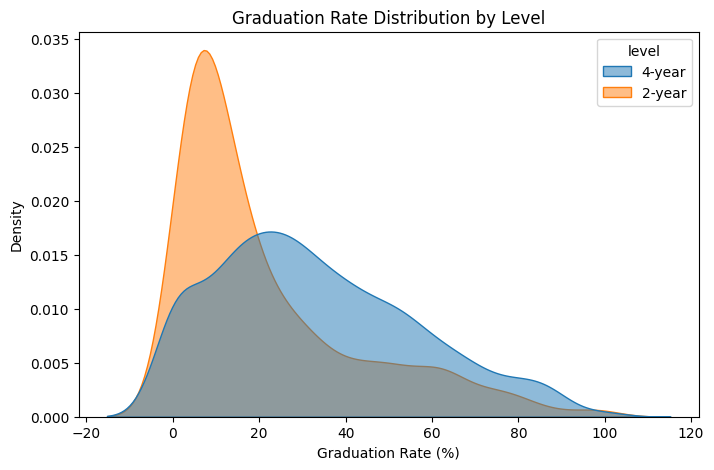


Graduation rates by CONTROL:
                          count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  

Graduation rates by LEVEL:
          count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

Graduation rates by CONTROL and LEVEL:
                                 count       mean        s

In [14]:
#5
# KDE by control
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="grad_100_value", hue="control", fill=True, common_norm=False, alpha=0.5)
plt.title("Graduation Rate Distribution by Control")
plt.xlabel("Graduation Rate (%)")
plt.show()

# KDE by level
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="grad_100_value", hue="level", fill=True, common_norm=False, alpha=0.5)
plt.title("Graduation Rate Distribution by Level")
plt.xlabel("Graduation Rate (%)")
plt.show()

# Grouped by control
control_stats = df.groupby("control")["grad_100_value"].describe()
print("\nGraduation rates by CONTROL:\n", control_stats)

# Grouped by level
level_stats = df.groupby("level")["grad_100_value"].describe()
print("\nGraduation rates by LEVEL:\n", level_stats)

# Grouped by both
combined_stats = df.groupby(["control", "level"])["grad_100_value"].describe()
print("\nGraduation rates by CONTROL and LEVEL:\n", combined_stats)

#Private not-for-profit and 4-year institutions appear to have the highest graduation rates.

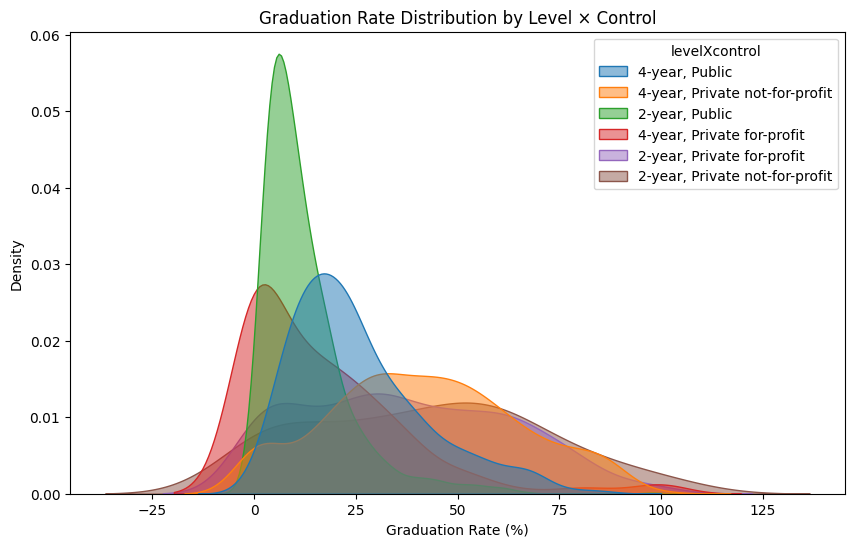

In [15]:
#6
df['levelXcontrol']=df['level']+', '+df['control']

plt.figure(figsize=(10,6))
sns.kdeplot(
    data=df.dropna(subset=['grad_100_value']),
    x="grad_100_value",
    hue="levelXcontrol",
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title("Graduation Rate Distribution by Level × Control")
plt.xlabel("Graduation Rate (%)")
plt.show()

#Institutions that are private not-for-profit and 4-year appear to have the highest graduation rates.

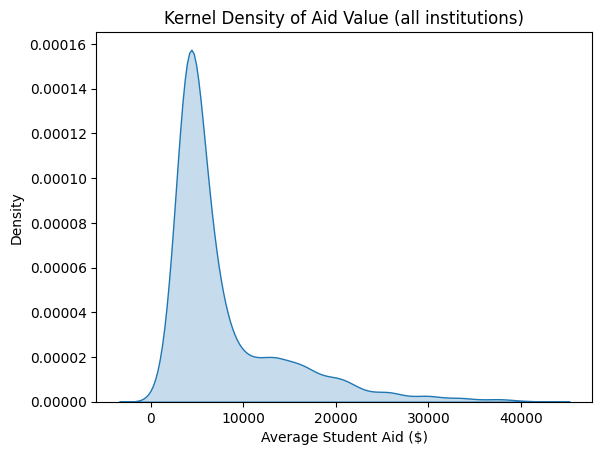

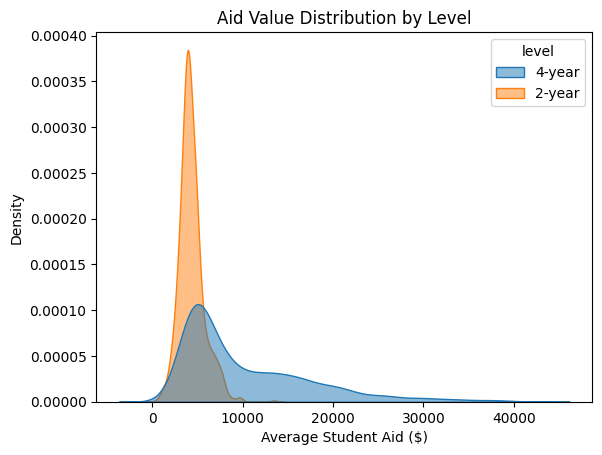

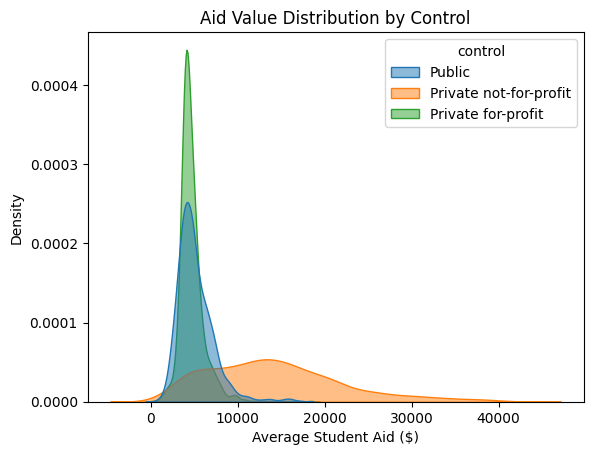


Aid value by LEVEL:
          count          mean          std    min     25%     50%      75%  \
level                                                                       
2-year  1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year  2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

            max  
level            
2-year  13654.0  
4-year  41580.0  

Aid value by CONTROL:
                          count          mean          std    min      25%  \
control                                                                     
Private for-profit       991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit  1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                  1558.0   5094.835687  2136.436370  881.0  3725.25   

                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0

In [19]:
#7
# Drop missing values
df = df.dropna(subset=['aid_value'])

# Overall KDE
sns.kdeplot(x=df["aid_value"], fill=True)
plt.title("Kernel Density of Aid Value (all institutions)")
plt.xlabel("Average Student Aid ($)")
plt.show()

# Grouped KDE by level
sns.kdeplot(data=df, x="aid_value", hue="level", fill=True, common_norm=False, alpha=0.5)
plt.title("Aid Value Distribution by Level")
plt.xlabel("Average Student Aid ($)")
plt.show()

# Grouped KDE by control
sns.kdeplot(data=df, x="aid_value", hue="control", fill=True, common_norm=False, alpha=0.5)
plt.title("Aid Value Distribution by Control")
plt.xlabel("Average Student Aid ($)")
plt.show()

# Grouped by level
level_stats = df.groupby("level")["aid_value"].describe()
print("\nAid value by LEVEL:\n", level_stats)

# Grouped by control
control_stats = df.groupby("control")["aid_value"].describe()
print("\nAid value by CONTROL:\n", control_stats)

# Grouped by both level and control
combined_stats = df.groupby(["level","control"])["aid_value"].describe()
print("\nAid value by LEVEL × CONTROL:\n", combined_stats)

#The data is heavily skewed right which explains the large increase on the Kernel Density plot.
# The shape of the KDE (low-end cluster + long right tail) is also explained by the contrast
# between 2-year/Public/For-profit schools (low aid, tight distributions) and 4-year
# Private not-for-profit institutions (high aid, huge spread). Private not-for-profit, 4-year
# colleges provide the largest aid packages on average, reflecting higher tuition costs and
# greater institutional resources.


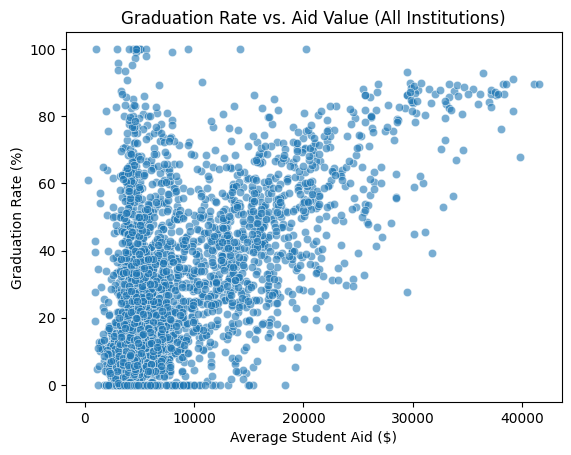

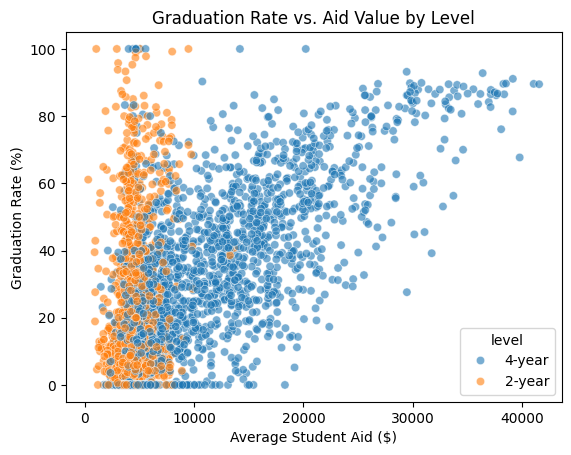

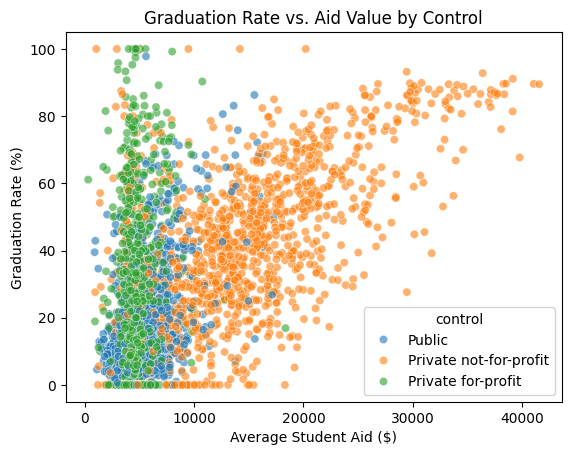

In [22]:
#8

# Basic scatterplot
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", alpha=0.6)
plt.title("Graduation Rate vs. Aid Value (All Institutions)")
plt.xlabel("Average Student Aid ($)")
plt.ylabel("Graduation Rate (%)")
plt.show()

#Grouped scatterplot by level
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="level", alpha=0.6)
plt.title("Graduation Rate vs. Aid Value by Level")
plt.xlabel("Average Student Aid ($)")
plt.ylabel("Graduation Rate (%)")
plt.show()

#Grouped scatterplot by control
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="control", alpha=0.6)
plt.title("Graduation Rate vs. Aid Value by Control")
plt.xlabel("Average Student Aid ($)")
plt.ylabel("Graduation Rate (%)")
plt.show()

#Aid seems to matter the most for 4-year and private not-for-profit institutions, as more aid
# corresponds strongly with higher graduation rates.
# For Public institutions, there is some positive relatioship between Aid and Graduation Rate, but flatter.
# Aid helps, but other structural factors (large student populations, transfer rates) likely dilute the effect.
# For private for-profit institutons, aid doesn't make that much of a difference for graduation rates.